# How to use the Pytrends API to get Google Trends data
By Mr. Data Science

## A brief overview:
Throughout this article, I will:
* Describe the Pytrends python library and the syntax you need to get Google Trends data
* Demonstrate how to get google trends data using several examples

## These are my assumptions:
Since I can't cover everything in this article, I will assume the following:
* You have Python>3.3 installed on your machine and know how to use it
* You are able to install new python libraries on your own
* You want to programmatically get google trends data

## Google Trends and the Pytrends library:
<strong>Google Trends</strong> is a Google owned website that analyzes search term popularity across various regions and languages. On the [Google Trends site](https://trends.google.com/trends/?geo=US), you can see trending keywords, assess the popularity of specific search terms over different time periods, explore related keywords, and much more. I encourage you to check out their site if you've never been there before. Beware, you'll likely go down a rabbit hole ;). 

As a curious and innovative human being, you might be interested in tapping into this wonderful resource to make predictions or understand human behavior. The way you do that is using the <strong>Pytrends python library</strong>. Pytrends, according to the [Pytrends PyPI page](https://pypi.org/project/pytrends/), is an unofficial Google Trends API that can be used to extract useful search information using a simple interface. Beware that, due to the unofficial API status, any changes to Google Trend's backend could impact a users' ability to use the library. Make sure Pytrends is still active and up to date when you read this article.

## Setting up your Python environment:
To use the Pytrends API, you will need to do the following:
* Make sure you have an internet connection 
* Open your command prompt and make sure you can run python and pip from your command prompt. See [this link](https://packaging.python.org/tutorials/installing-packages/) if you need help
* Run <strong>"pip install pytrends"</strong> to install the Pytrends library. 
 * Note that during installation, pip may need to install Requests, lxml, and Pandas. This is normal behavior as these libraries are required for Pytrends to work properly.
* Run "pip freeze" to display the installed python libraries. verify that pytrends appears on the list.

## Getting Started

The first thing you want to do is establish a connection with google. There are several options for adjusting connection parameters (such as using proxies, timeouts and retries), but that is beyond the scope of this discussion. For now, lets just connect using the following commands.

In [1]:
# import the TrendReq method from the pytrends request module
from pytrends.request import TrendReq

# execute the TrendReq method by passing the host language (hl) and timezone (tz) parameters
pytrends = TrendReq(hl='en-US', tz=360)

After establishing a connection with Google, you must build a payload. For an API, the payload contains relevant request information that helps the service understand what data you want to obtain. A simple payload building example is shown below.

In [2]:
# build list of keywords
kw_list = ["ai", "chicken", "space"] 

# build the payload
pytrends.build_payload(kw_list, timeframe='2015-01-01 2021-01-01', geo='US') 

In the example, several parameters were used to tell google the type of information we would like to request. 
* kw_list: a list of keywords to get data for (limit of 5 keywords at a time)
* geo: the geographic location.
* timeframe: the time frame of interest.

## Let's look at a few examples:
After you've built the payload, you can start to extract useful information using several Pytrends methods. Several examples are shown below:

### Example 1: Interest over time
First, lets take a look at how these keywords changed in popularity over time. lets get the interest over time and print the top 20 rows to see what the data looks like first.

In [3]:
# import pandas module
import pandas as pd

# store interest over time information in df
df = pytrends.interest_over_time()

# display the top 20 rows in dataframe
print(df.head(20)) 

            ai  chicken  space isPartial
date                                    
2015-01-01   3       64     31     False
2015-02-01   3       59     29     False
2015-03-01   3       56     28     False
2015-04-01   3       54     29     False
2015-05-01   3       53     28     False
2015-06-01   2       54     26     False
2015-07-01   2       57     26     False
2015-08-01   2       57     25     False
2015-09-01   2       58     26     False
2015-10-01   2       60     28     False
2015-11-01   2       57     26     False
2015-12-01   2       55     26     False
2016-01-01   2       75     27     False
2016-02-01   2       70     27     False
2016-03-01   3       65     26     False
2016-04-01   2       67     28     False
2016-05-01   2       64     27     False
2016-06-01   2       63     23     False
2016-07-01   2       64     23     False
2016-08-01   2       62     23     False


Now that we know what the data looks like, lets plot the popularity of each keyword over the time period we requested:

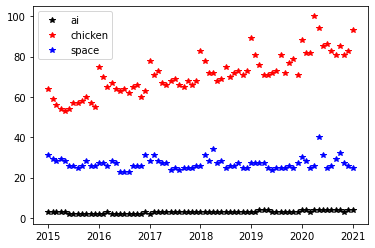

In [4]:
# import matplotlib plotting module to visualize data (make sure matplotlib is installed using pip)
import matplotlib.pyplot as plt

# plot all three trends in same chart
plt.figure()
plt.plot(df.index,df.ai,'k*')
plt.plot(df.index,df.chicken,'r*')
plt.plot(df.index,df.space,'b*')
plt.legend(['ai','chicken','space'])

In the plot above, we can see that:
* Chicken is more popular than ai and space (makes sense since people are generally more interested in food)
* The popularity of chicken is growing over time whereas ai and space popularity are rather stagnant
* There is a spike in chicken's popularity at the beginning of each year (All those new years resolutions)

While silly to compare these to each other, you can start to see the power of using google trends for inference. If I was a betting man, I would say chicken's popularity will continue to grow... Lets see how its popularity compares to other meats...

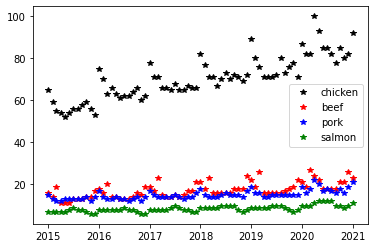

In [5]:
# build list of keywords
kw_list = ["chicken", "beef", "pork", "salmon"] 

# build the payload
pytrends.build_payload(kw_list, cat=None, timeframe='2015-01-01 2021-01-01', geo='US') 

# get the interest over time
df = pytrends.interest_over_time()

# plot food trends over time
plt.figure()
plt.plot(df.index,df.chicken,'k*')
plt.plot(df.index,df.beef,'r*')
plt.plot(df.index,df.pork,'b*')
plt.plot(df.index,df.salmon,'g*')
plt.legend(['chicken','beef','pork','salmon'])

The results indicate that chicken is much more popular than other meats. Don't race to invet in chicken however, the percentage change in popularity appears to be fairly consistent among the different meets...

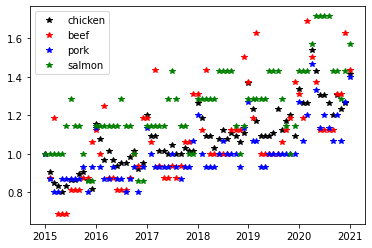

In [6]:
# plot normalized food trends over time
plt.figure()
plt.plot(df.index,df.chicken/df.chicken.iloc[0],'k*')
plt.plot(df.index,df.beef/df.beef.iloc[0],'r*')
plt.plot(df.index,df.pork/df.pork.iloc[0],'b*')
plt.plot(df.index,df.salmon/df.salmon.iloc[0],'g*')
plt.legend(['chicken','beef','pork','salmon'])

### Example 2: Related topics, queries, and suggestions
While interest over time is interesting, you may want to use google trends to find related topics, queries, and/or suggestions. To do so, you can use the related_topics(), related_queries(), and suggestions() methods. 

First, lets look at related topics:

In [7]:
# build the payload
pytrends.build_payload(kw_list=['chicken'], timeframe='2015-01-01 2021-01-01', geo='US') 

# get related topics
df_rt = pytrends.related_topics()

df_rt is a dictionary of related_topics information. Specifically, the dictionary contains a keyword key and two related topics subkeys ('rising' and 'top'). If you are looking for rising popularity topics, use the 'rising' results. If you just want the top search results, look in 'top'... Lets look at the top 5 rising results:

In [8]:
# display top 5 rising results for the chicken keyword
print(df_rt['chicken']['rising'].head(5))

   value formattedValue                                               link  \
0  70950       Breakout  /trends/explore?q=/g/11f2wjbq6z&date=2015-01-0...   
1   3800        +3,800%  /trends/explore?q=/m/012l6kq_&date=2015-01-01+...   
2    650          +650%  /trends/explore?q=/m/0130rtg7&date=2015-01-01+...   
3    400          +400%  /trends/explore?q=/m/080hx6n&date=2015-01-01+2...   
4    350          +350%  /trends/explore?q=/m/0s8wfcb&date=2015-01-01+2...   

       topic_mid                       topic_title          topic_type  
0  /g/11f2wjbq6z                       Instant Pot               Topic  
1    /m/012l6kq_                         Air fryer               Topic  
2    /m/0130rtg7               Chicken Salad Chick  Restaurant company  
3     /m/080hx6n                       Hot chicken                Food  
4     /m/0s8wfcb  Gus's World Famous Fried Chicken  Restaurant company  


In the 'rising' set of results, we can see that instant pot and air fryer searches are among the top rising topics related to chicken. Next, lets see the top topics:

In [9]:
# display top 5 top results for the chicken keyword
print(df_rt['chicken']['top'].head(5))

   value formattedValue  hasData  \
0    100            100     True   
1     82             82     True   
2     30             30     True   
3     12             12     True   
4     10             10     True   

                                                link   topic_mid  \
0  /trends/explore?q=/m/0f25w9&date=2015-01-01+20...   /m/0f25w9   
1  /trends/explore?q=/m/09b5t&date=2015-01-01+202...    /m/09b5t   
2  /trends/explore?q=/m/0p57p&date=2015-01-01+202...    /m/0p57p   
3  /trends/explore?q=/m/0k5sv46&date=2015-01-01+2...  /m/0k5sv46   
4  /trends/explore?q=/m/0dv34&date=2015-01-01+202...    /m/0dv34   

      topic_title topic_type  
0         Chicken    Poultry  
1         Chicken      Birds  
2          Recipe      Topic  
3  Chicken breast    Chicken  
4          Baking      Topic  


These results are less exciting because the word chicken is in 3 of the topic_title rows. However, you can see that the topic_type or category changes. To google, these types of searches provide somewhat different results. 

Next, lets look at related queries:

In [10]:
# build the payload
pytrends.build_payload(kw_list=['chicken'], timeframe='2015-01-01 2021-01-01', geo='US') 

# get related queries
df_rq = pytrends.related_queries()

# display df_rq
print(df_rq)

{'chicken': {'top':                      query  value
0          chicken recipes    100
1           chicken breast     82
2            fried chicken     75
3             chicken soup     54
4            baked chicken     42
5            chicken salad     42
6            chicken wings     36
7          chicken near me     35
8           chicken thighs     28
9             bake chicken     27
10       crock pot chicken     25
11         grilled chicken     22
12       chicken casserole     22
13        crockpot chicken     21
14     instant pot chicken     20
15        chicken and rice     20
16             bbq chicken     19
17  chicken breast recipes     16
18        parmesan chicken     16
19         popeyes chicken     15
20     slow cooker chicken     15
21                 popeyes     15
22     chicken noodle soup     15
23         chicken alfredo     14
24         chicken pot pie     14, 'rising':                              query  value
0              instant pot chicken  41950
1

Like related_topics, related_queries returns a dictionary containing top and rising query results.

Finally, we can get suggested search keywords as shown below:

In [11]:
# get suggestions
df_s = pytrends.suggestions('chicken')

# display df_rq
print(df_s)

[{'mid': '/m/09b5t', 'title': 'Chicken', 'type': 'Birds'}, {'mid': '/m/0f25w9', 'title': 'Chicken', 'type': 'Poultry'}, {'mid': '/m/01r6j', 'title': 'Chickenpox', 'type': 'Disease'}, {'mid': '/m/09b6t', 'title': 'KFC', 'type': 'Fast food restaurant company'}, {'mid': '/m/02df9j', 'title': 'Red junglefowl', 'type': 'Birds'}]


Unlike related_topics and related_queries, suggestions does not require that a payload be built first. Instead, the keyword is passed to the method. The suggestions are just like the "autocomplete" information you get when typing in your search.

### Example 3: Trending searches and top search charts
In the final set of examples, lets look at trending and top search results. This use case is more exploratory than the others and helps answer the question, "what are other people searching for". First, lets look at trending searches. 

In [12]:
pytrends.trending_searches(pn='united_states')

,0
0,Larry King
1,FA Cup
2,Hank Aaron COVID vaccine
3,Mega Millions
4,Hank Aaron
5,JoJo Siwa
6,UFC 257
7,Sabrina Carpenter
8,Nets
9,Fate: The Winx Saga


On 1/23/2021, these were the trending search results in the United States. Simply change pn to the location you desire in order to get trending information for your area of interest.

to get top results, you must include the date. host language(hl), timezone(tz) and geographic location(geo) are optional inputs. 

In [13]:
# get top charts results. Note that date must be provided in the following format: 'YYYY' or 'YYYYMM'
pytrends.top_charts(date='2020', hl='en-US', tz=360, geo='US')

,title,exploreQuery
0,Election results,
1,Coronavirus,
2,Kobe Bryant,
3,Coronavirus update,
4,Coronavirus symptoms,
5,Zoom,
6,Who is winning the election,
7,Naya Rivera,
8,Chadwick Boseman,
9,PlayStation 5,PS5


## An IMPORTANT note on multiple api requests:
Before concluding our discussion on using Pytrends, I wanted to leave you with a brief warning. Like any site, Google has specific terms of service that you should review prior to using Pytrends. If you overuse the Pytrends API, Google WILL throttle your access to their site. According to the Pytrends PyPI page, the Google Trends request rate limit is not publicly known. Apparently, one user reported that 1,400 sequential requests of a 4 hour timeframe got them to the limit, but this likely varies with query size and request frequency. Upon reaching the rate limit, Google will throttle future requests. At least 60 seconds of sleep will be necessary once you hit the limit. Please note that this may change over time. I will do my best to keep this post current. 

## A quick review of what you've learned:
If you've made it this far, you are more than ready to use Pytrends in your application. Specifically, you've learned:
* How to install the Pytrends library
* How to establish a connection with Google and Build an API payload using Pytrends
* How to get interest over time for multiple keywords by geographic location, timezones, and date ranges
* How to get keyword related topics, queries, and suggestions
* How to identify trending and top search results

If you have any feedback or suggestions for improving this article, we would love to hear from you. Please reach out via Medium, GitHub, or our [website](https://www.mrdatascience.com).

## References:
* Pytrends 4.7.3. https://pypi.org/project/pytrends/
* Google Trends. https://trends.google.com/trends/?geo=US
* Installing Packages. https://packaging.python.org/tutorials/installing-packages/

## Connect With Mr Data Science:
<a href="https://www.mrdatascience.com">MrDataScience.com</a>,
<a href="https://github.com/MrDataScience">GitHub</a>,
<a href="https://medium.com/@mrdatascience">Medium</a>,
